## Code and Output

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist_train = pd.read_csv("C:/Users/ruchi/Desktop/datasets/mnist_train.csv")
mnist_test = pd.read_csv("C:/Users/ruchi/Desktop/datasets/mnist_test.csv")

In [3]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = mnist_train.drop(columns = 'label')
y_train = mnist_train['label']
X_test = mnist_test.drop(columns = 'label')
y_test = mnist_test['label']

In [5]:
shuffle_index_train = np.random.permutation(X_train.shape[0])[:500]
X_train = X_train.iloc[shuffle_index_train]
y_train = y_train.iloc[shuffle_index_train]
shuffle_index_test = np.random.permutation(X_test.shape[0])[:100]
X_test = X_test.iloc[shuffle_index_test]
y_test = y_test.iloc[shuffle_index_test]
original_dimension = X_train.shape[1]
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
37245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
random_digit_loc = 0
digit = np.array(X_train.iloc[random_digit_loc])
digit = digit.reshape((28, 28))

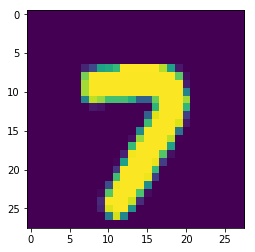

Label : 7


In [7]:
plt.imshow(digit, interpolation='nearest')
plt.show()
print('Label : %d'%y_train.iloc[random_digit_loc])

In [8]:
from sklearn.preprocessing import StandardScaler
X_train = pd.DataFrame(X_train, dtype = float)
X_test = pd.DataFrame(X_test, dtype = float)
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
type(X_train)

pandas.core.frame.DataFrame

In [10]:
X_train.shape

(500, 784)

In [11]:
# normalise the training and test data
X_train_normalised = scaler.transform(X_train)
X_test_normalised = scaler.transform(X_test)

In [12]:
type(X_train_normalised)

numpy.ndarray

In [13]:
# use PCA to reduce dimension of the data
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X_train_normalised)
print('Number of attributes reduced from {} to {} in training dataset'.format(original_dimension, pca.n_components_))

Number of attributes reduced from 784 to 153 in training dataset


In [14]:
X_train_reduced = pca.transform(X_train_normalised)
X_test_reduced = pca.transform(X_test_normalised)

In [15]:
X_train_reduced.shape

(500, 153)

In [16]:
# aprroximate from compressed representation of data back to original high dimensional data
approximation = pca.inverse_transform(X_train_reduced)

Text(0.5, 1.0, 'Image retaining 95% variance')

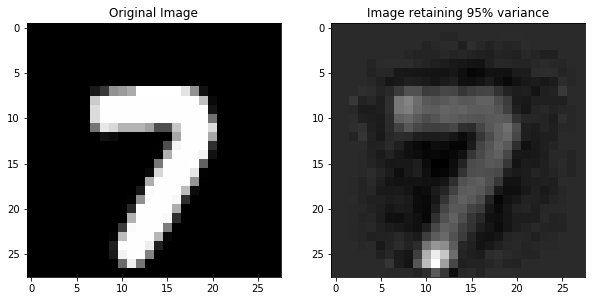

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax[0].imshow(digit, interpolation='nearest', cmap = plt.cm.gray)
ax[1].imshow(approximation[random_digit_loc].reshape((28, 28)), interpolation='nearest', cmap = plt.cm.gray)
ax[0].set_title('Original Image')
ax[1].set_title('Image retaining 95% variance')